In [144]:
import numpy as np
import pandas as pd

import datetime as dt
import time
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

import re

In [2]:
df1 = pd.read_csv('open/Onlinesales_info.csv')
df2 = pd.read_csv('open/Customer_info.csv')
df3 = pd.read_csv('open/Discount_info.csv')
df4 = pd.read_csv('open/Marketing_info.csv')
df5 = pd.read_csv('open/Tax_info.csv')

In [3]:
len(df1)

52924

In [4]:
df1.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used


In [5]:
df = pd.merge(df1, df2, how='left', on='고객ID')

In [6]:
df.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,남,Chicago,12
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,남,Chicago,12
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used,남,Chicago,12


In [7]:
ddd = list(df1['제품카테고리'].unique())
ddd.sort()
ddd

['Accessories',
 'Android',
 'Apparel',
 'Backpacks',
 'Bags',
 'Bottles',
 'Drinkware',
 'Fun',
 'Gift Cards',
 'Google',
 'Headgear',
 'Housewares',
 'Lifestyle',
 'More Bags',
 'Nest',
 'Nest-Canada',
 'Nest-USA',
 'Notebooks & Journals',
 'Office',
 'Waze']

In [8]:
ccc = list(df3['제품카테고리'].unique())
ccc = sorted(ccc)
ccc

['Accessories',
 'Android',
 'Apparel',
 'Bags',
 'Bottles',
 'Drinkware',
 'Gift Cards',
 'Headgear',
 'Housewares',
 'Lifestyle',
 'Nest',
 'Nest-Canada',
 'Nest-USA',
 'Notebooks',
 'Notebooks & Journals',
 'Office',
 'Waze']

In [9]:
df = pd.merge(df, df5, how='left', on='제품카테고리')

In [10]:
df['거래날짜'] = pd.to_datetime(df['거래날짜'])

In [11]:
df['월'] = df['거래날짜'].dt.month

In [12]:
def month_shift(x):
    dict = {1:'Jan',
            2:'Feb',
            3:'Mar',
            4:'Apr',
            5:'May',
            6:'Jun',
            7:'Jul',
            8:'Aug',
            9:'Sep',
            10:'Oct',
            11:'Nov',
            12:'Dec'}
    
    return dict[x]

In [13]:
df['월'] = df['월'].apply(month_shift)

In [14]:
df.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,GST,월
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12,0.10,Jan
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12,0.10,Jan
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,남,Chicago,12,0.10,Jan
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,남,Chicago,12,0.18,Jan
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used,남,Chicago,12,0.18,Jan


In [15]:
df = pd.merge(df, df3, how='left', on=['월', '제품카테고리'])

In [16]:
df.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,GST,월,쿠폰코드,할인율
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12,0.10,Jan,ELEC10,10.0
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12,0.10,Jan,ELEC10,10.0
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,남,Chicago,12,0.10,Jan,OFF10,10.0
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,남,Chicago,12,0.18,Jan,SALE10,10.0
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used,남,Chicago,12,0.18,Jan,AIO10,10.0


In [17]:
df4['날짜'] = pd.to_datetime(df4['날짜'])

In [18]:
df = pd.merge(df, df4, how='left', left_on='거래날짜', right_on='날짜')

In [19]:
df.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,GST,월,쿠폰코드,할인율,날짜,오프라인비용,온라인비용
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12,0.10,Jan,ELEC10,10.0,2019-01-01,4500,2424.5
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12,0.10,Jan,ELEC10,10.0,2019-01-01,4500,2424.5
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,남,Chicago,12,0.10,Jan,OFF10,10.0,2019-01-01,4500,2424.5
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,남,Chicago,12,0.18,Jan,SALE10,10.0,2019-01-01,4500,2424.5
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used,남,Chicago,12,0.18,Jan,AIO10,10.0,2019-01-01,4500,2424.5


In [20]:
df.to_csv('open/total_merge.csv')

In [21]:
len(df)

52924

<AxesSubplot:xlabel='거래날짜', ylabel='오프라인비용'>

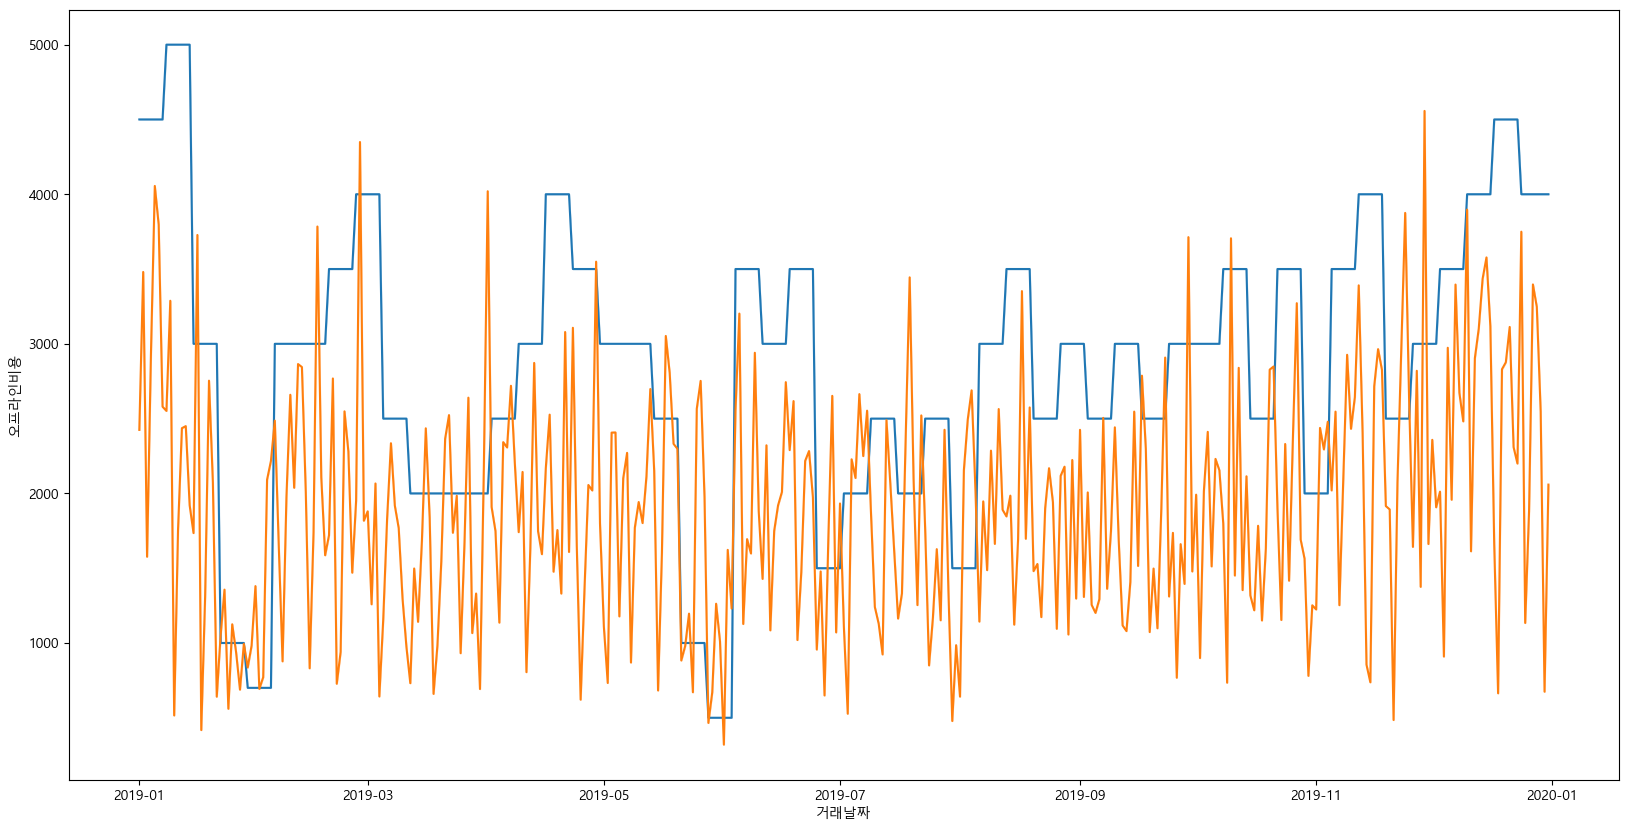

In [22]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=df, x='거래날짜', y='오프라인비용')
sns.lineplot(data=df, x='거래날짜', y='온라인비용')


In [23]:
len(df['제품카테고리'].unique())

20

In [24]:
core = pd.DataFrame(df.groupby('제품카테고리')['제품ID'].value_counts())


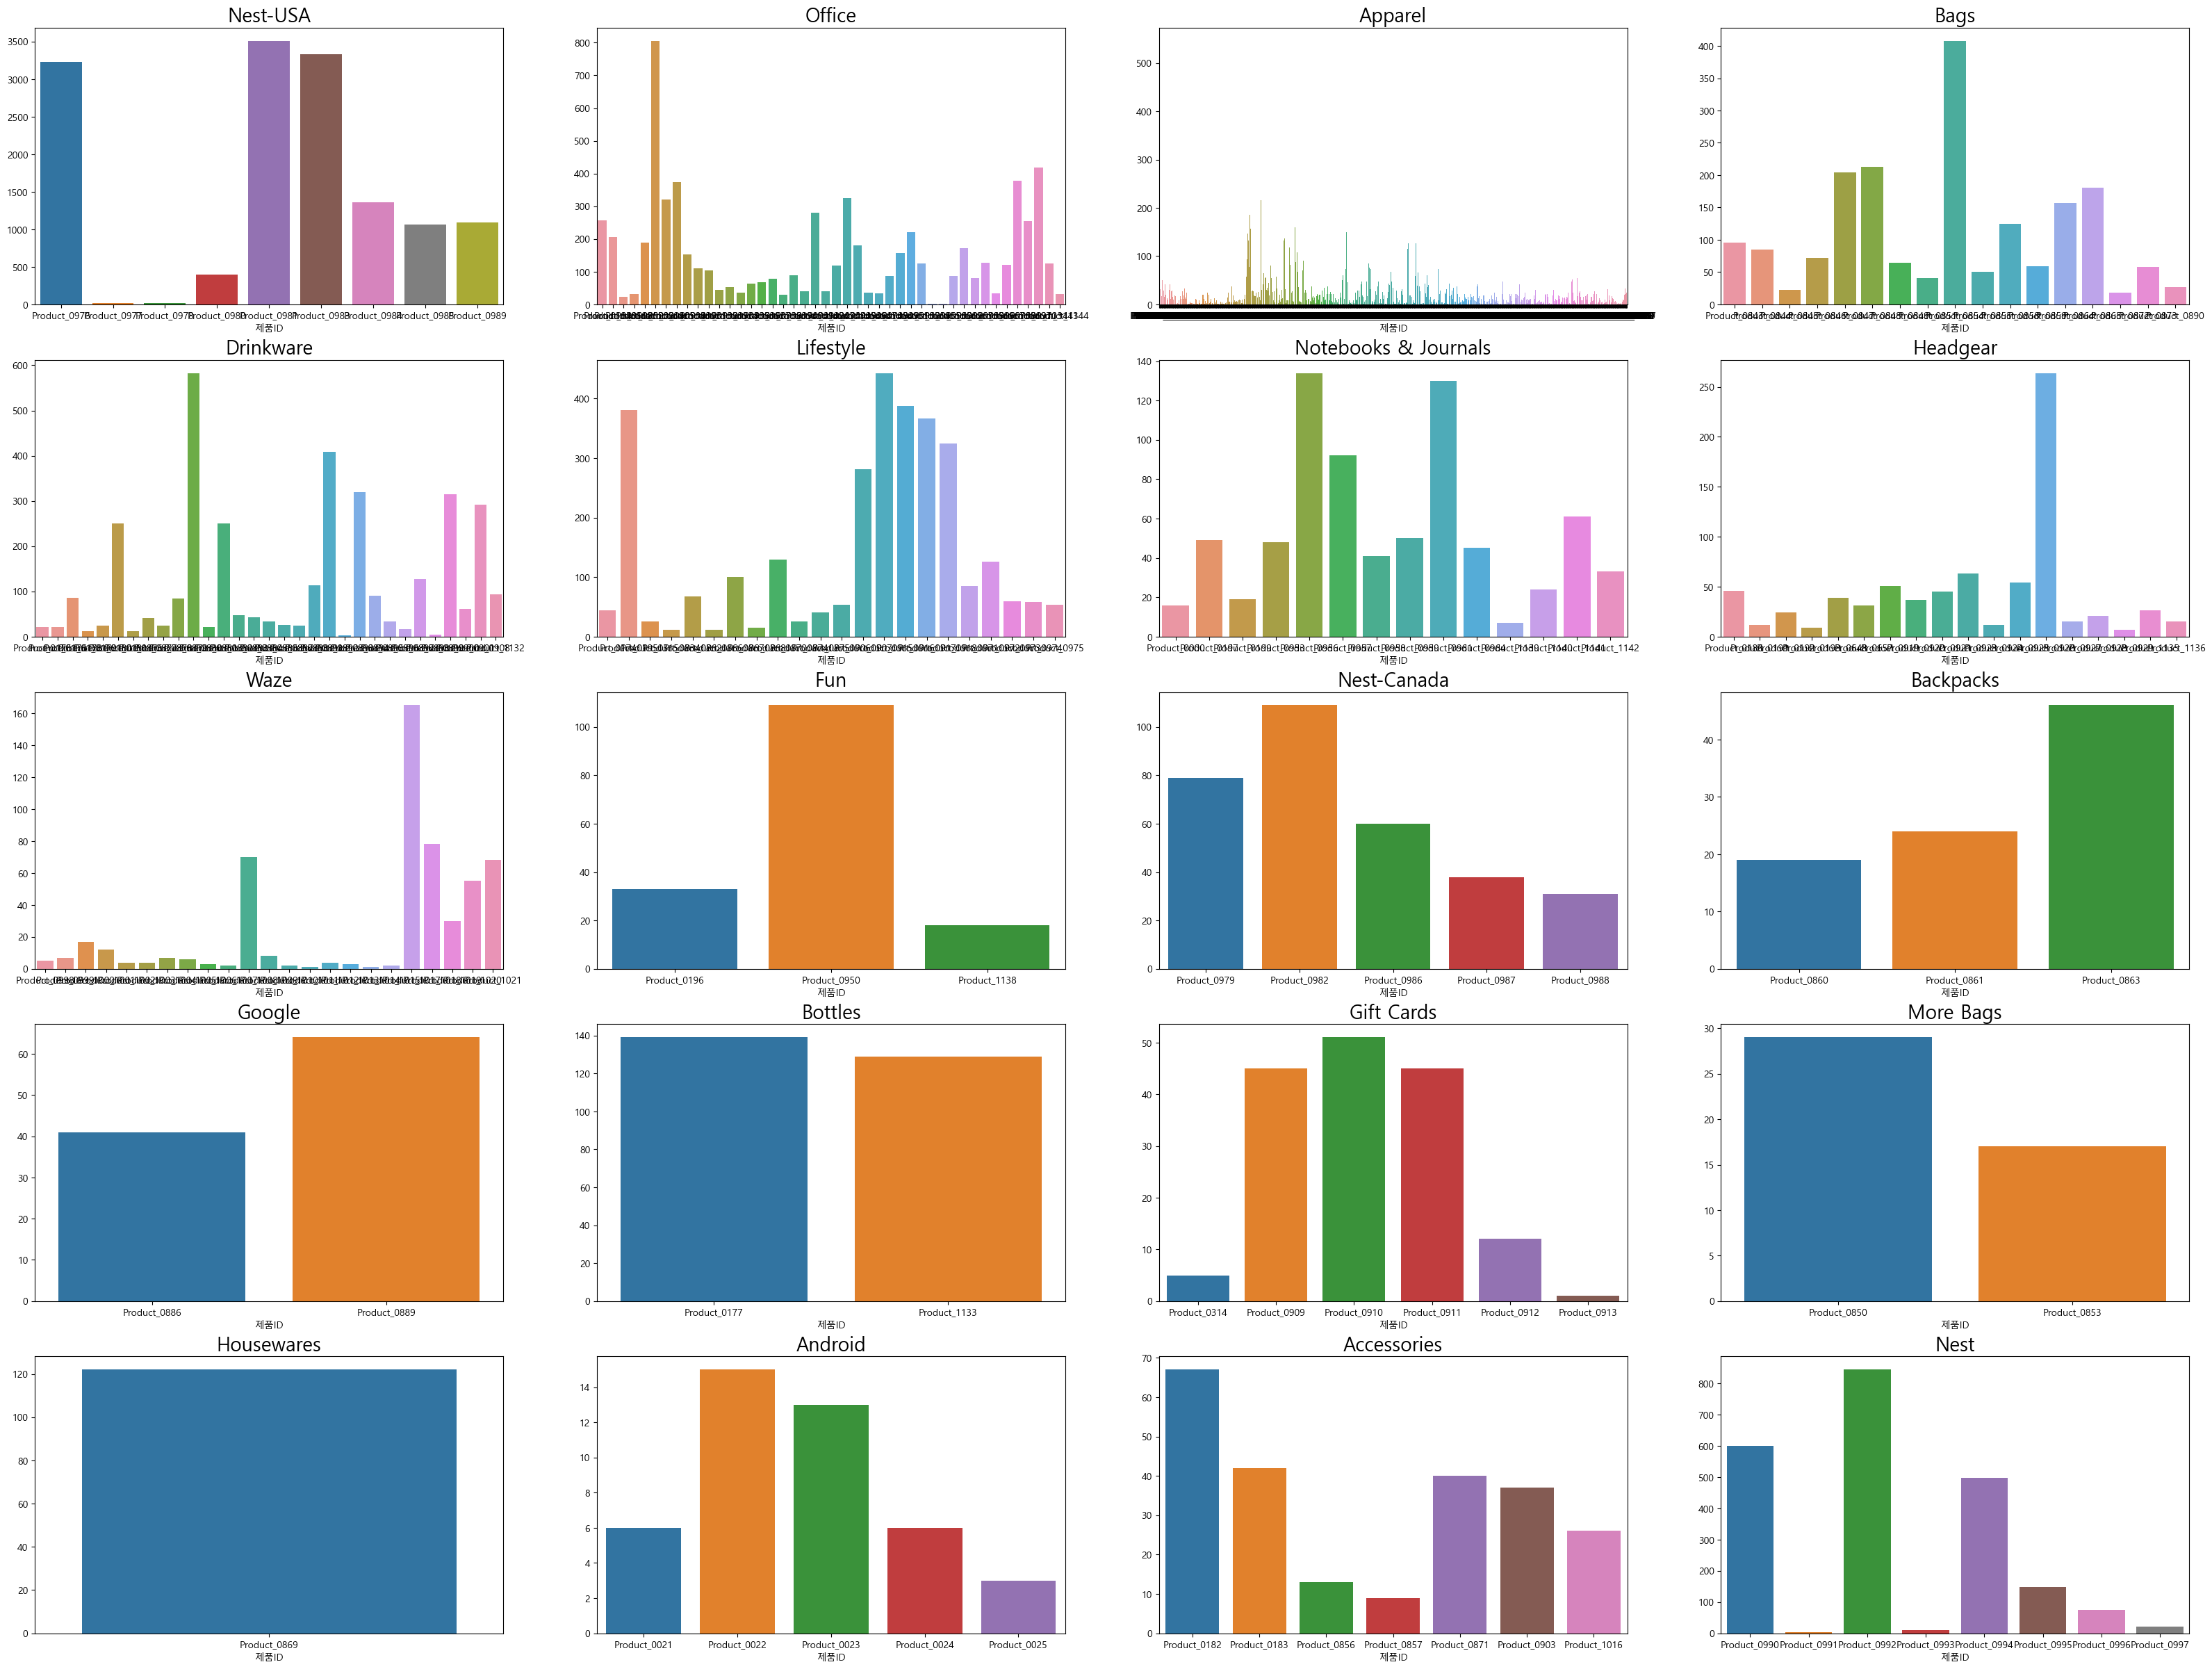

In [25]:
plt.figure(figsize=(40, 30))

for i, category in enumerate(df['제품카테고리'].unique()):
    temp = core.loc[category, :].sort_index()
    plt.subplot(5, 4, i+1)
    sns.barplot(data=temp, x=temp.index, y=[temp.values[i][0] for i in range(temp.values.size)])
    plt.title(category, fontsize=20)

plt.show()

In [26]:
core2 = pd.DataFrame(df.groupby(['제품카테고리', '제품ID'])['평균금액'].sum())


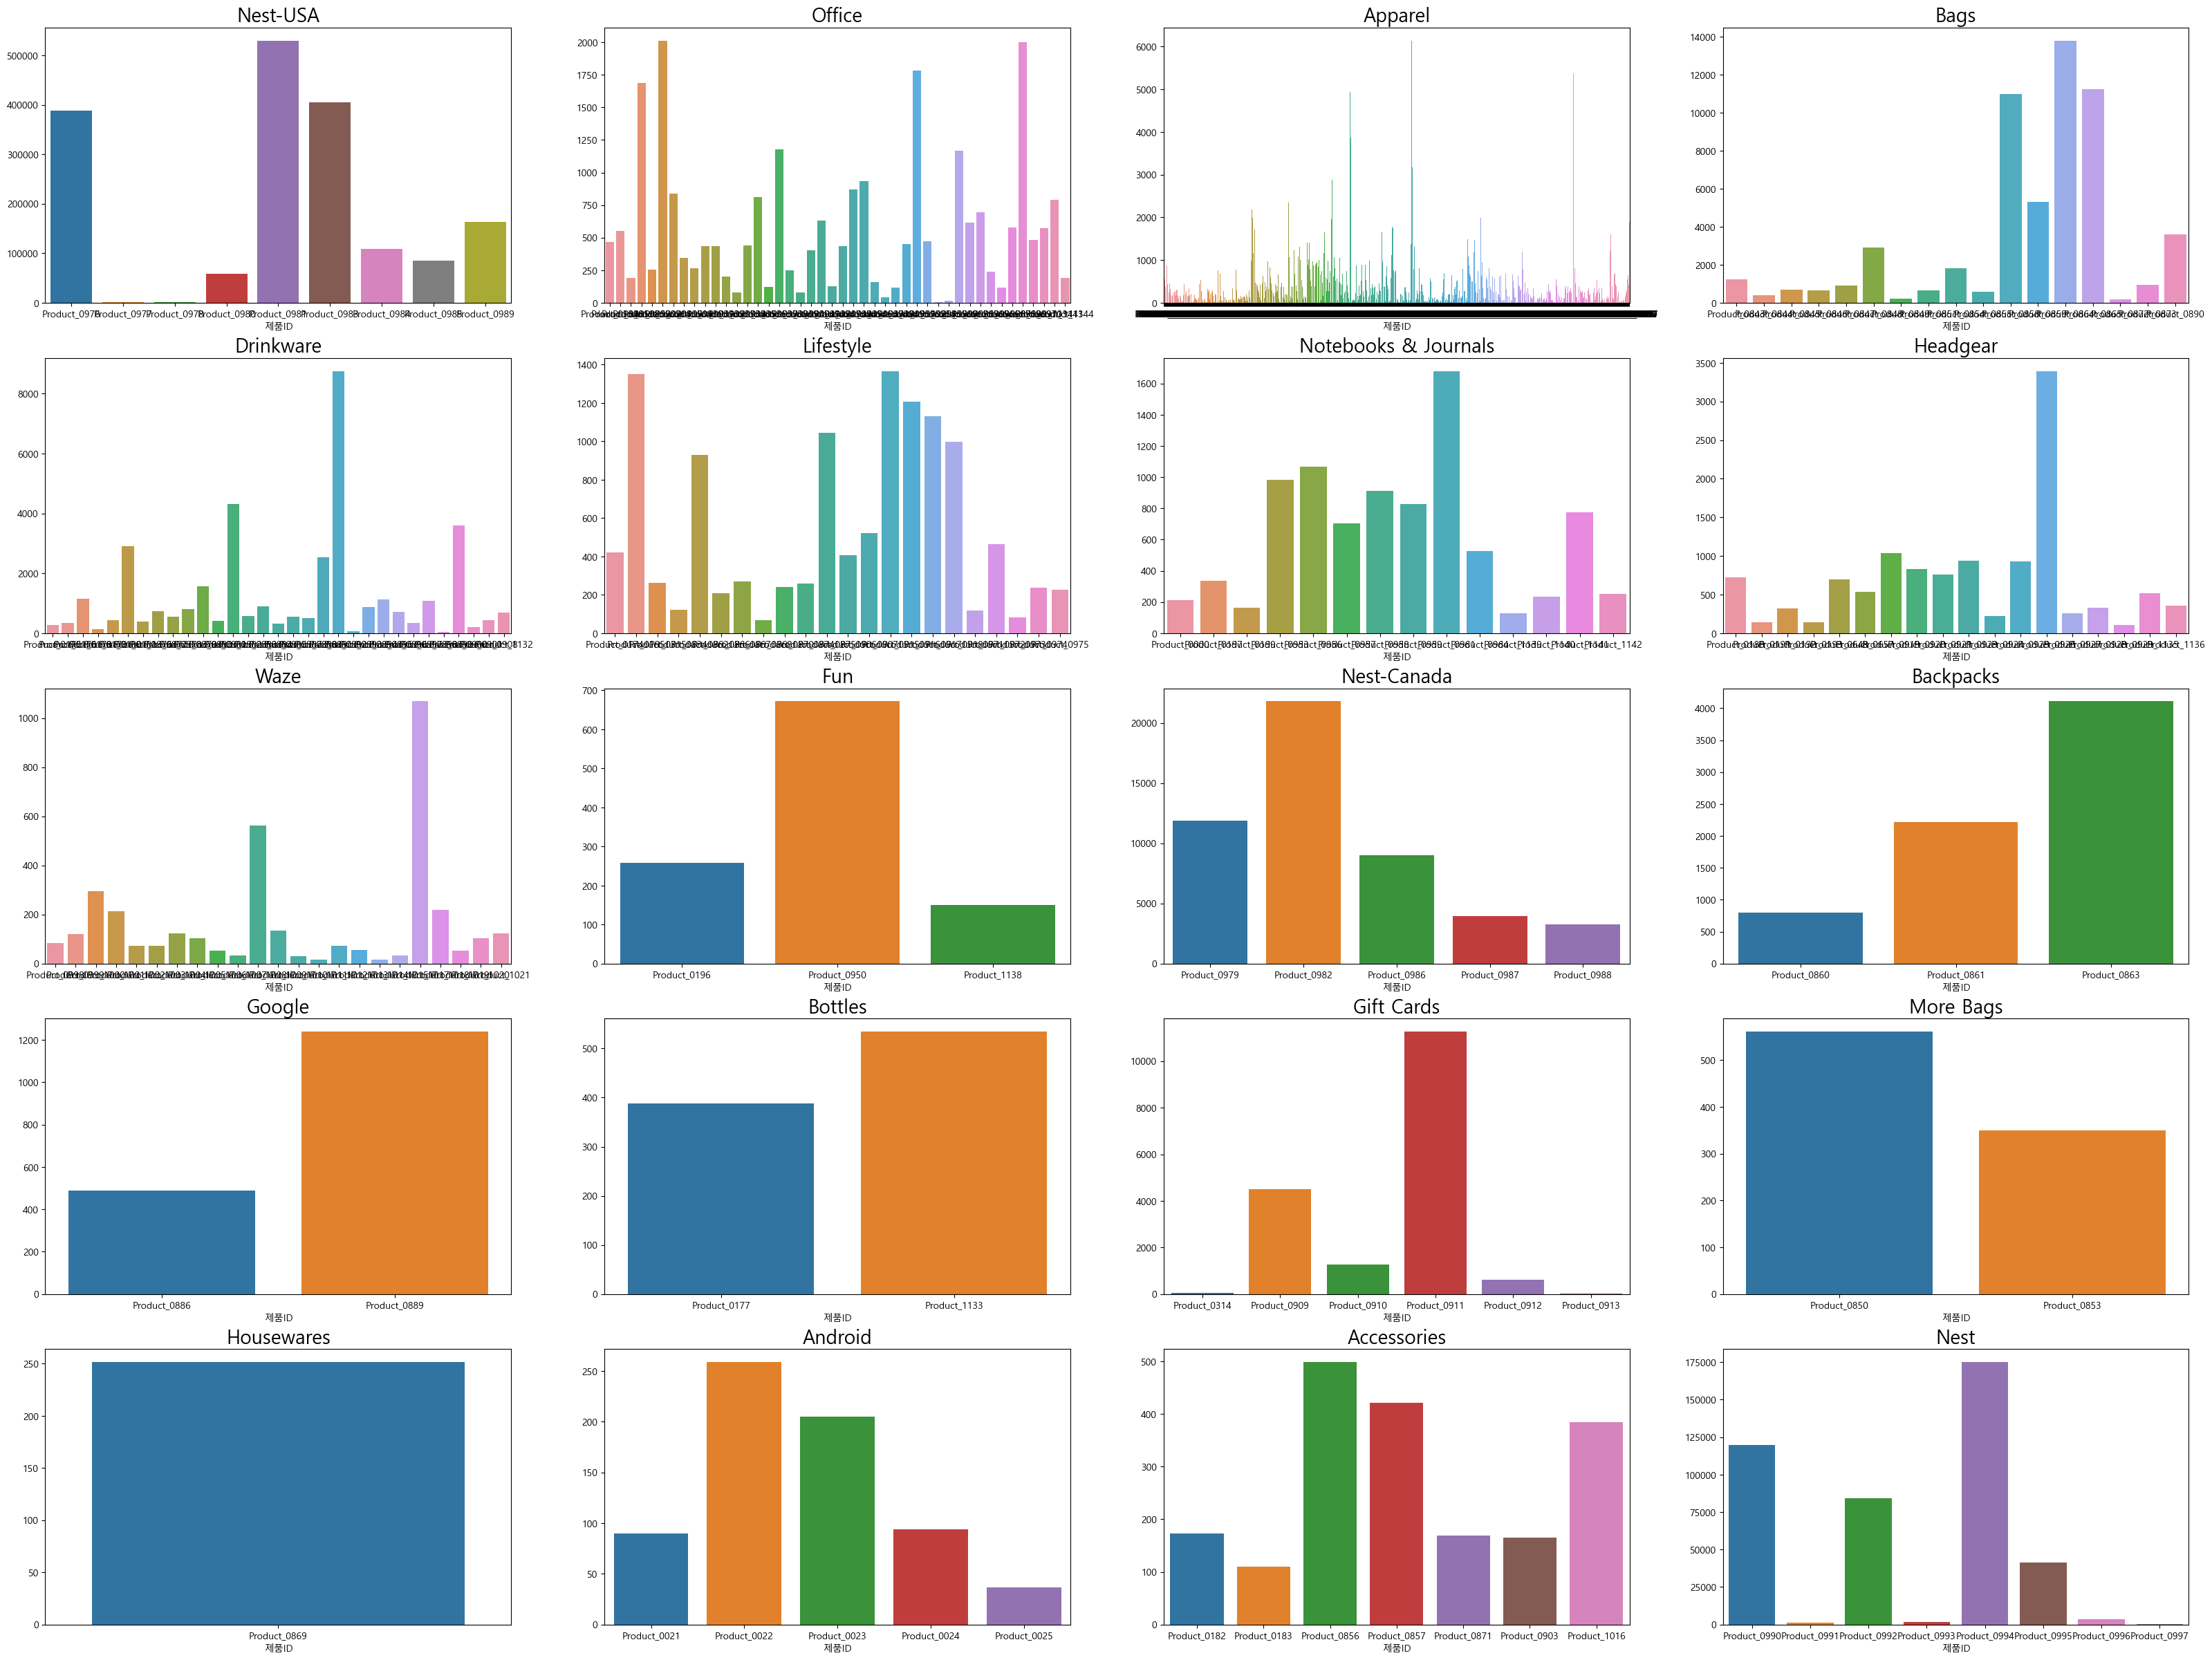

In [27]:
plt.figure(figsize=(40, 30))

for i, category in enumerate(df['제품카테고리'].unique()):
    temp = core2.loc[category, :].sort_index()
    plt.subplot(5, 4, i+1)
    sns.barplot(data=temp, x=temp.index, y=[temp.values[i][0] for i in range(temp.values.size)])
    plt.title(category, fontsize=20)

In [28]:
df.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,GST,월,쿠폰코드,할인율,날짜,오프라인비용,온라인비용
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12,0.10,Jan,ELEC10,10.0,2019-01-01,4500,2424.5
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12,0.10,Jan,ELEC10,10.0,2019-01-01,4500,2424.5
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,남,Chicago,12,0.10,Jan,OFF10,10.0,2019-01-01,4500,2424.5
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,남,Chicago,12,0.18,Jan,SALE10,10.0,2019-01-01,4500,2424.5
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used,남,Chicago,12,0.18,Jan,AIO10,10.0,2019-01-01,4500,2424.5


<AxesSubplot:xlabel='고객ID'>

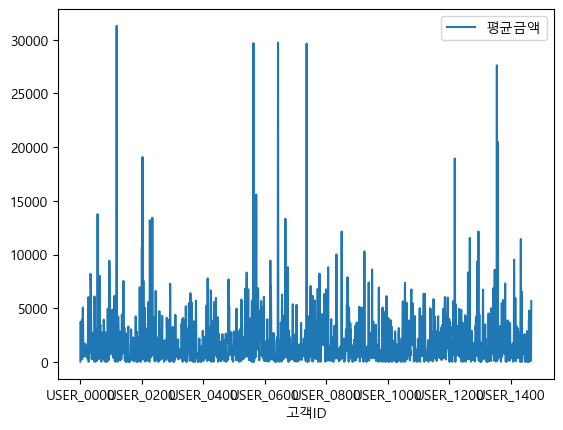

In [29]:
core3 = pd.DataFrame(df.groupby('고객ID')['평균금액'].sum())
core3.plot()

<AxesSubplot:xlabel='고객ID'>

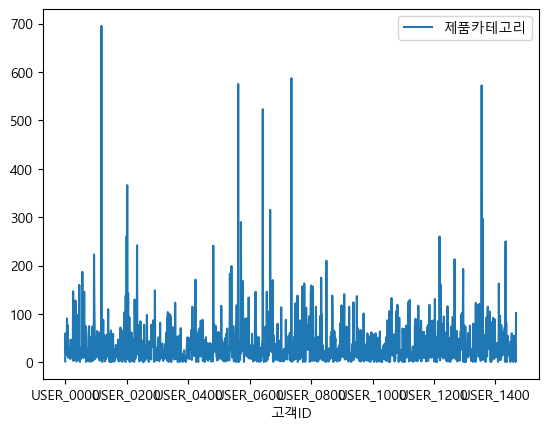

In [30]:
core4 = pd.DataFrame(df.groupby('고객ID')['제품카테고리'].count())
core4.plot()

In [31]:
core4.loc[('USER_0000', ), :].values.sum()

2

In [32]:
df.isnull().sum()

고객ID        0
거래ID        0
거래날짜        0
제품ID        0
제품카테고리      0
수량          0
평균금액        0
배송료         0
쿠폰상태        0
성별          0
고객지역        0
가입기간        0
GST         0
월           0
쿠폰코드      400
할인율       400
날짜          0
오프라인비용      0
온라인비용       0
dtype: int64

In [33]:
df4

,날짜,오프라인비용,온라인비용
0,2019-01-01,4500,2424.50
1,2019-01-02,4500,3480.36
2,2019-01-03,4500,1576.38
3,2019-01-04,4500,2928.55
4,2019-01-05,4500,4055.30
...,...,...,...
360,2019-12-27,4000,3396.87
361,2019-12-28,4000,3246.84
362,2019-12-29,4000,2546.58
363,2019-12-30,4000,674.31


<AxesSubplot:xlabel='날짜', ylabel='오프라인비용'>

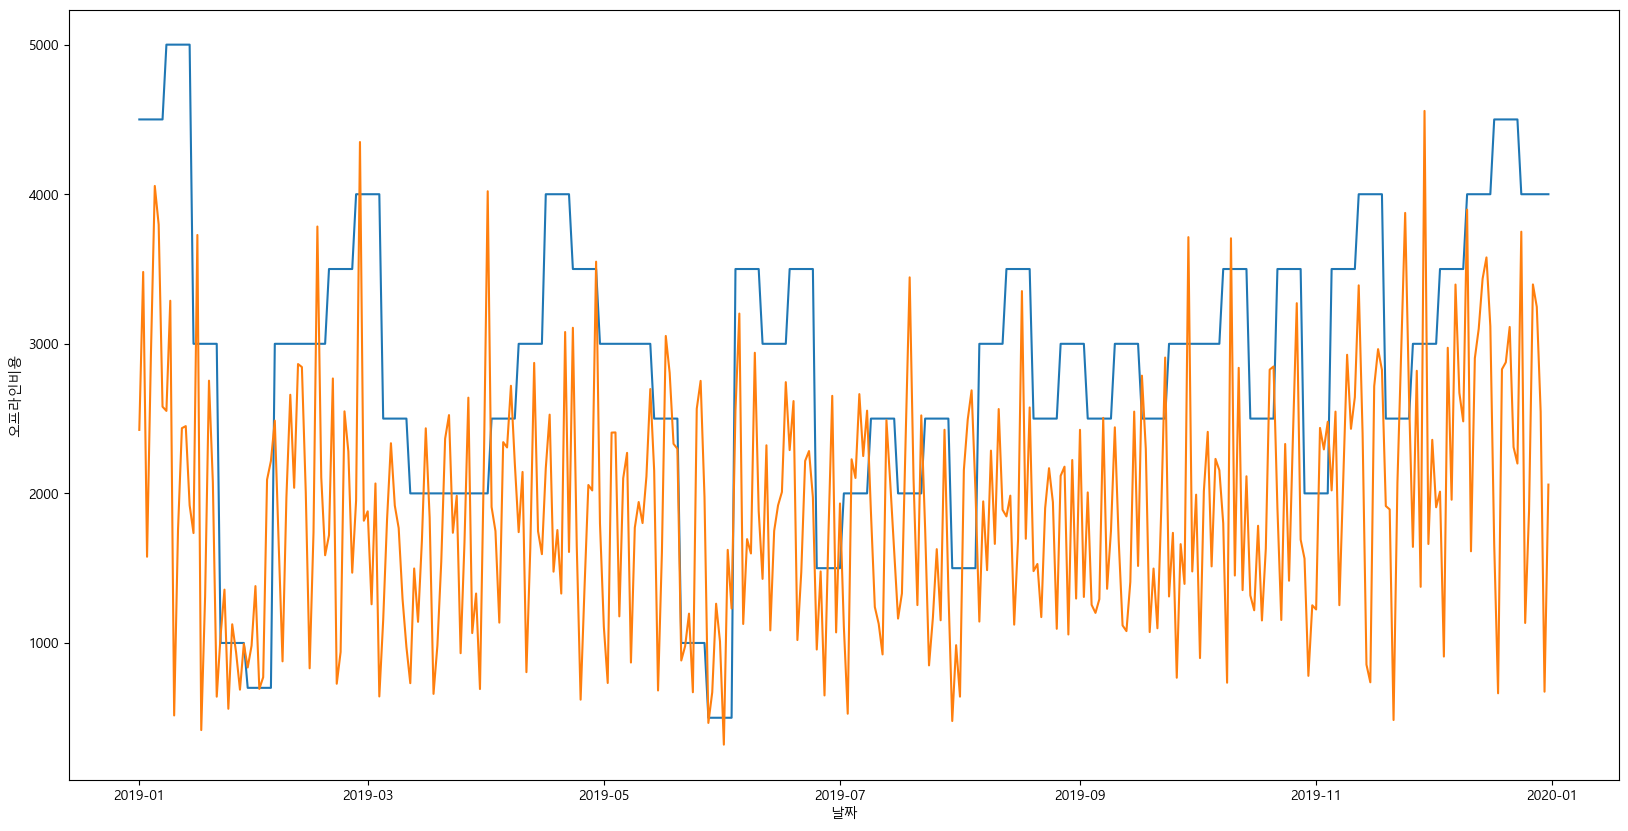

In [34]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=df4, x='날짜', y='오프라인비용')
sns.lineplot(data=df4, x='날짜', y='온라인비용')

In [35]:
df.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,GST,월,쿠폰코드,할인율,날짜,오프라인비용,온라인비용
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12,0.10,Jan,ELEC10,10.0,2019-01-01,4500,2424.5
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12,0.10,Jan,ELEC10,10.0,2019-01-01,4500,2424.5
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,남,Chicago,12,0.10,Jan,OFF10,10.0,2019-01-01,4500,2424.5
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,남,Chicago,12,0.18,Jan,SALE10,10.0,2019-01-01,4500,2424.5
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used,남,Chicago,12,0.18,Jan,AIO10,10.0,2019-01-01,4500,2424.5


In [36]:
df['제품카테고리'].unique()

array(['Nest-USA', 'Office', 'Apparel', 'Bags', 'Drinkware', 'Lifestyle',
       'Notebooks & Journals', 'Headgear', 'Waze', 'Fun', 'Nest-Canada',
       'Backpacks', 'Google', 'Bottles', 'Gift Cards', 'More Bags',
       'Housewares', 'Android', 'Accessories', 'Nest'], dtype=object)

In [95]:
df['쿠폰코드'] = df['쿠폰코드'].fillna(np.nan)
df['할인율'] = df['할인율'].fillna(0)

In [96]:
df['총금액'] = df['평균금액'] * df['수량']
df.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,GST,월,쿠폰코드,할인율,날짜,오프라인비용,온라인비용,총금액
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12,0.10,Jan,ELEC10,10.0,2019-01-01,4500,2424.5,153.71
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12,0.10,Jan,ELEC10,10.0,2019-01-01,4500,2424.5,153.71
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,남,Chicago,12,0.10,Jan,OFF10,10.0,2019-01-01,4500,2424.5,2.05
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,남,Chicago,12,0.18,Jan,SALE10,10.0,2019-01-01,4500,2424.5,87.65
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used,남,Chicago,12,0.18,Jan,AIO10,10.0,2019-01-01,4500,2424.5,16.50


In [206]:
today_date = dt.datetime(2019,12,31)
rfm = pd.DataFrame(df.groupby('고객ID').agg({'거래ID':'nunique',
                          '총금액':'sum',
                          '거래날짜': lambda x: (today_date - x.max()).days}))

In [207]:
rfm = rfm.rename(columns={'거래ID':'Frequency',
                          '총금액':'Monetary',
                          '거래날짜':'Recency'})
rfm = rfm[['Recency', 'Frequency', 'Monetary']]
rfm.describe()

,Recency,Frequency,Monetary
count,1468.000000,1468.000000,1468.000000
mean,144.292234,18.141008,3181.740204
std,101.936959,24.976414,5065.804553
min,0.000000,1.000000,1.000000
25%,55.000000,5.000000,652.412500
50%,131.000000,11.000000,1750.410000
75%,220.000000,23.000000,3917.887500
max,364.000000,328.000000,75937.550000


(array([280., 178., 175., 178., 156., 127.,  90., 130.,  50., 104.]),
 array([  0. ,  36.4,  72.8, 109.2, 145.6, 182. , 218.4, 254.8, 291.2,
        327.6, 364. ]),
 <BarContainer object of 10 artists>)

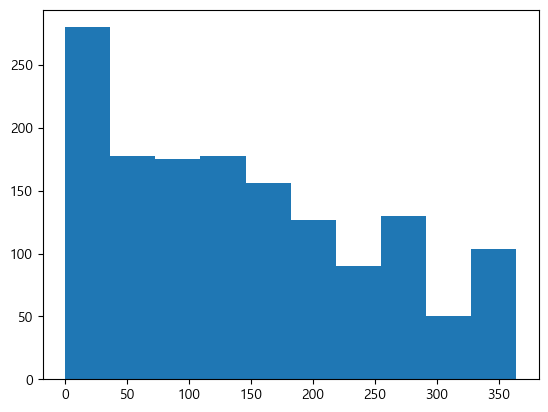

In [145]:
plt.hist(rfm['Recency'])

(array([1.265e+03, 1.530e+02, 3.300e+01, 8.000e+00, 2.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 4.000e+00, 1.000e+00]),
 array([  1. ,  33.7,  66.4,  99.1, 131.8, 164.5, 197.2, 229.9, 262.6,
        295.3, 328. ]),
 <BarContainer object of 10 artists>)

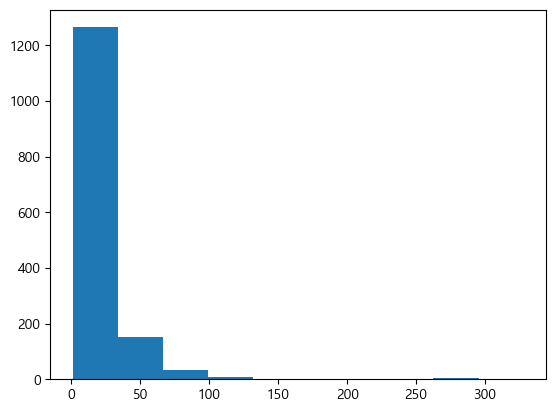

In [146]:
plt.hist(rfm['Frequency'])

(array([1.331e+03, 1.080e+02, 1.800e+01, 4.000e+00, 2.000e+00, 0.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 2.000e+00]),
 array([1.0000000e+00, 7.5946550e+03, 1.5188310e+04, 2.2781965e+04,
        3.0375620e+04, 3.7969275e+04, 4.5562930e+04, 5.3156585e+04,
        6.0750240e+04, 6.8343895e+04, 7.5937550e+04]),
 <BarContainer object of 10 artists>)

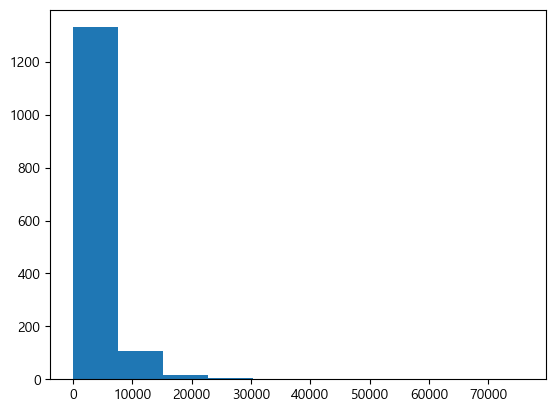

In [147]:
plt.hist(rfm['Monetary'])

In [148]:
rfm2 = rfm.copy()

In [208]:
label_r = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
label_f = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
label_m = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]



rfm["recency_score"] = pd.qcut(rfm["Recency"], 10, labels=label_r)
rfm["frequency_score"] = pd.qcut(rfm["Frequency"], 10, labels=label_f)
rfm["monetary_score"] = pd.qcut(rfm["Monetary"], 15, labels=label_m)
rfm["RFM_SCORE"] = rfm["recency_score"].astype(str) + '/' + rfm["frequency_score"].astype(str) + '/' + rfm["monetary_score"].astype(str)




In [288]:
rfm2 = rfm.copy()
label_r = [5, 4, 3, 2, 1]
label_f = [1, 2, 3, 4, 5]
label_m = [1, 2, 3, 4, 5]



rfm2["recency_score"] = pd.cut(rfm2["Recency"], bins=[0, 36, 146, 255, 328, 365], labels=label_r, include_lowest=True)
rfm2["frequency_score"] = pd.cut(rfm2["Frequency"], bins=[0, 33, 66, 99, 131, 329], labels=label_f, include_lowest=True)
rfm2["monetary_score"] = pd.cut(rfm2["Monetary"], bins=[0, 7600, 15200, 23500, 30000, 76000], labels=label_m, include_lowest=True)
rfm2["RFM_SCORE"] = rfm2["recency_score"].astype(str) + rfm2["frequency_score"].astype(str) + rfm2["monetary_score"].astype(str)

rfm2

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
고객ID,,,,,,,
USER_0000,107,1,30.99,4,1,1,411
USER_0001,59,31,13834.90,4,1,2,412
USER_0002,73,8,1442.12,4,1,1,411
USER_0003,17,11,1360.07,5,1,1,511
USER_0004,107,13,1442.47,4,1,1,411
...,...,...,...,...,...,...,...
USER_1463,270,3,544.34,2,1,1,211
USER_1464,87,19,2363.05,4,1,1,411
USER_1465,194,2,101.56,3,1,1,311


In [292]:
seg_map = {
    r'[1-2][1-2][1-5]': 'Hibernating',
    r'[1-2][3-4][1-5]': 'At Risk',
    r'[1-2]5[1-5]': 'Can\'t Lose',
    r'3[1-2][1-5]': 'About to Sleep',
    r'33[1-5]': 'Need Attention',
    r'[3-4][4-5][1-5]': 'Loyal Customers',
    r'41[1-5]': 'Promising',
    r'51[1-5]': 'New Customers',
    r'[4-5][2-3][1-5]': 'Potential Loyalists',
    r'5[4-5][1-5]': 'Champions'
}

In [294]:
rfm2['Segmentation'] = rfm2['RFM_SCORE'].replace(seg_map, regex=True)
rfm2

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,Segmentation
고객ID,,,,,,,,
USER_0000,107,1,30.99,4,1,1,411,Promising
USER_0001,59,31,13834.90,4,1,2,412,Promising
USER_0002,73,8,1442.12,4,1,1,411,Promising
USER_0003,17,11,1360.07,5,1,1,511,New Customers
USER_0004,107,13,1442.47,4,1,1,411,Promising
...,...,...,...,...,...,...,...,...
USER_1463,270,3,544.34,2,1,1,211,Hibernating
USER_1464,87,19,2363.05,4,1,1,411,Promising
USER_1465,194,2,101.56,3,1,1,311,About to Sleep


In [295]:
df.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,GST,월,쿠폰코드,할인율,날짜,오프라인비용,온라인비용,총금액
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12,0.10,Jan,ELEC10,10.0,2019-01-01,4500,2424.5,153.71
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12,0.10,Jan,ELEC10,10.0,2019-01-01,4500,2424.5,153.71
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,남,Chicago,12,0.10,Jan,OFF10,10.0,2019-01-01,4500,2424.5,2.05
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,남,Chicago,12,0.18,Jan,SALE10,10.0,2019-01-01,4500,2424.5,87.65
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used,남,Chicago,12,0.18,Jan,AIO10,10.0,2019-01-01,4500,2424.5,16.50


In [302]:
coupon = pd.DataFrame(df.groupby('고객ID')['쿠폰상태'].value_counts() / df.groupby('고객ID')['쿠폰상태'].count())
coupon

쿠폰상태
고객ID      쿠폰상태              
USER_0000 Used      1.000000
USER_0001 Clicked   0.433333
          Used      0.333333
          Not Used  0.233333
USER_0002 Clicked   0.478261
...                      ...
USER_1465 Not Used  0.125000
USER_1466 Not Used  1.000000
USER_1467 Clicked   0.500000
          Used      0.372549
          Not Used  0.127451

[4038 rows x 1 columns]

In [340]:
coupon_core = pd.DataFrame(coupon.loc[([i if i != 0 else 0 for i in df['고객ID'].unique()], 'Used'), :].sort_index())
coupon_core

,,쿠폰상태
고객ID,쿠폰상태,
USER_0000,Used,1.000000
USER_0001,Used,0.333333
USER_0002,Used,0.478261
USER_0003,Used,0.352941
USER_0004,Used,0.305556
...,...,...
USER_1461,Used,0.380952
USER_1463,Used,0.428571
USER_1464,Used,0.400000


In [349]:
rfm3 = pd.merge(rfm2, coupon_core, how='left', on='고객ID')
rfm3 = rfm3.rename(columns={'쿠폰상태':'쿠폰사용률'})

In [350]:
rfm3.groupby('Segmentation')['쿠폰사용률'].mean().sort_values()

Segmentation
Can't Lose             0.306397
At Risk                0.333333
Potential Loyalists    0.338185
Loyal Customers        0.338785
Champions              0.340581
Need Attention         0.345873
New Customers          0.352645
About to Sleep         0.356301
Promising              0.371903
Hibernating            0.378260
Name: 쿠폰사용률, dtype: float64

In [364]:
rfm3['ratio'] = rfm3['쿠폰사용률'] / rfm3['Frequency']
rfm3

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,Segmentation,쿠폰사용률,ratio
고객ID,,,,,,,,,,
USER_0000,107,1,30.99,4,1,1,411,Promising,1.000000,1.000000
USER_0001,59,31,13834.90,4,1,2,412,Promising,0.333333,0.010753
USER_0002,73,8,1442.12,4,1,1,411,Promising,0.478261,0.059783
USER_0003,17,11,1360.07,5,1,1,511,New Customers,0.352941,0.032086
USER_0004,107,13,1442.47,4,1,1,411,Promising,0.305556,0.023504
...,...,...,...,...,...,...,...,...,...,...
USER_1463,270,3,544.34,2,1,1,211,Hibernating,0.428571,0.142857
USER_1464,87,19,2363.05,4,1,1,411,Promising,0.400000,0.021053
USER_1465,194,2,101.56,3,1,1,311,About to Sleep,0.375000,0.187500


In [366]:
rfm3.groupby('Segmentation')['ratio'].mean().sort_values()

Segmentation
Can't Lose             0.001731
Champions              0.001927
Loyal Customers        0.002710
Need Attention         0.004372
At Risk                0.004831
Potential Loyalists    0.007108
New Customers          0.053344
Promising              0.078647
About to Sleep         0.079518
Hibernating            0.114676
Name: ratio, dtype: float64

In [221]:
df.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,GST,월,쿠폰코드,할인율,날짜,오프라인비용,온라인비용,총금액
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12,0.10,Jan,ELEC10,10.0,2019-01-01,4500,2424.5,153.71
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12,0.10,Jan,ELEC10,10.0,2019-01-01,4500,2424.5,153.71
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,남,Chicago,12,0.10,Jan,OFF10,10.0,2019-01-01,4500,2424.5,2.05
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,남,Chicago,12,0.18,Jan,SALE10,10.0,2019-01-01,4500,2424.5,87.65
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used,남,Chicago,12,0.18,Jan,AIO10,10.0,2019-01-01,4500,2424.5,16.50


In [352]:
month = pd.DataFrame(df.groupby('월')[['오프라인비용', '온라인비용', '총금액']].sum())
month.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month

,오프라인비용,온라인비용,총금액
Jan,13459000,8196922.13,401618.42
Feb,16834500,11551233.77,401210.37
Mar,17720000,11244402.01,523258.19
Apr,9481400,6360136.05,310819.80
May,12365900,7686875.17,403624.58
Jun,11563000,9055934.41,372638.07
Jul,11189000,7436403.73,321081.38
Aug,10488500,6965280.31,349608.09
Sep,9951500,7574021.02,307763.42
Oct,12161500,8934799.69,508942.62


<AxesSubplot:xlabel='총금액', ylabel='오프라인비용'>

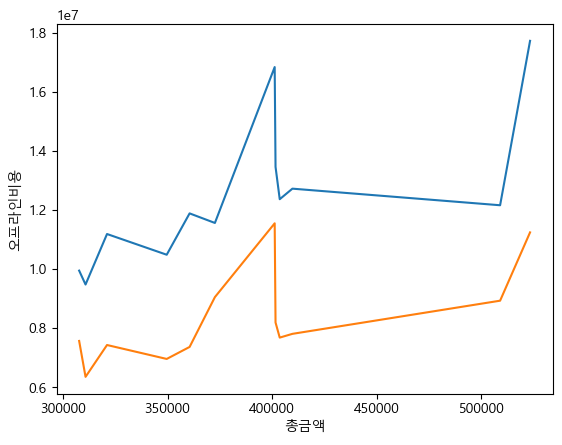

In [359]:
sns.lineplot(data=month, x='총금액', y='오프라인비용')
sns.lineplot(data=month, x='총금액', y='온라인비용')

<AxesSubplot:ylabel='오프라인비용'>

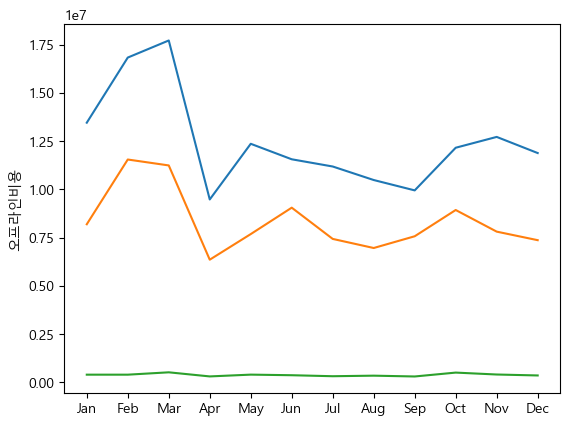

In [354]:
sns.lineplot(data=month, x=month.index, y='오프라인비용')
sns.lineplot(data=month, x=month.index, y='온라인비용')
sns.lineplot(data=month, x=month.index, y='총금액')

In [222]:
marketing = df[['거래날짜', '총금액', '오프라인비용', '온라인비용']]
marketing

,거래날짜,총금액,오프라인비용,온라인비용
0,2019-01-01,153.71,4500,2424.50
1,2019-01-01,153.71,4500,2424.50
2,2019-01-01,2.05,4500,2424.50
3,2019-01-01,87.65,4500,2424.50
4,2019-01-01,16.50,4500,2424.50
...,...,...,...,...
52919,2019-12-31,121.30,4000,2058.75
52920,2019-12-31,48.92,4000,2058.75
52921,2019-12-31,151.88,4000,2058.75
52922,2019-12-31,402.60,4000,2058.75


In [224]:
core = marketing[['거래날짜', '오프라인비용', '온라인비용']].drop_duplicates()
core

,거래날짜,오프라인비용,온라인비용
0,2019-01-01,4500,2424.50
89,2019-01-02,4500,3480.36
204,2019-01-03,4500,1576.38
411,2019-01-04,4500,2928.55
580,2019-01-05,4500,4055.30
...,...,...,...
52524,2019-12-27,4000,3396.87
52627,2019-12-28,4000,3246.84
52707,2019-12-29,4000,2546.58
52796,2019-12-30,4000,674.31


In [228]:
core2 = pd.DataFrame(marketing.groupby('거래날짜')['총금액'].sum())
core2 = core2.reset_index()

In [229]:
core2

,거래날짜,총금액
0,2019-01-01,7380.49
1,2019-01-02,13438.47
2,2019-01-03,23834.21
3,2019-01-04,16603.41
4,2019-01-05,17373.19
...,...,...
360,2019-12-27,13661.59
361,2019-12-28,10994.42
362,2019-12-29,12011.27
363,2019-12-30,8068.47


In [231]:
total = pd.merge(core, core2, how='left', on='거래날짜')
total

,거래날짜,오프라인비용,온라인비용,총금액
0,2019-01-01,4500,2424.50,7380.49
1,2019-01-02,4500,3480.36,13438.47
2,2019-01-03,4500,1576.38,23834.21
3,2019-01-04,4500,2928.55,16603.41
4,2019-01-05,4500,4055.30,17373.19
...,...,...,...,...
360,2019-12-27,4000,3396.87,13661.59
361,2019-12-28,4000,3246.84,10994.42
362,2019-12-29,4000,2546.58,12011.27
363,2019-12-30,4000,674.31,8068.47


In [279]:
total['ma_offline'] = total['오프라인비용'].rolling(7).mean()
total['ma_online'] = total['온라인비용'].rolling(7).mean()
total['ma_total'] = total['ma_online'] + total['ma_offline']
total = total.fillna(method='bfill')
total.head(10)

,거래날짜,오프라인비용,온라인비용,총금액,ma_offline,ma_online,ma_total
0,2019-01-01,4500,2424.50,7380.49,4500.000000,2977.351429,7477.351429
1,2019-01-02,4500,3480.36,13438.47,4500.000000,2977.351429,7477.351429
2,2019-01-03,4500,1576.38,23834.21,4500.000000,2977.351429,7477.351429
3,2019-01-04,4500,2928.55,16603.41,4500.000000,2977.351429,7477.351429
4,2019-01-05,4500,4055.30,17373.19,4500.000000,2977.351429,7477.351429
5,2019-01-06,4500,3796.85,14350.73,4500.000000,2977.351429,7477.351429
6,2019-01-07,4500,2579.52,5905.04,4500.000000,2977.351429,7477.351429
7,2019-01-08,5000,2551.38,7585.60,4571.428571,2995.477143,7566.905714
8,2019-01-09,5000,3287.83,18482.71,4642.857143,2967.972857,7610.830000
9,2019-01-10,5000,515.44,14724.46,4714.285714,2816.410000,7530.695714


In [280]:
total[['총금액', 'ma_offline', 'ma_online', 'ma_total', '온라인비용', '오프라인비용']].corr(method='pearson', min_periods=1)

,총금액,ma_offline,ma_online,ma_total,온라인비용,오프라인비용
총금액,1.000000,0.108035,0.208100,0.147291,0.100683,0.122454
ma_offline,0.108035,1.000000,0.749676,0.975969,0.277669,0.843485
ma_online,0.208100,0.749676,1.000000,0.875874,0.470763,0.752476
ma_total,0.147291,0.975969,0.875874,1.000000,0.357462,0.862772
온라인비용,0.100683,0.277669,0.470763,0.357462,1.000000,0.351122
오프라인비용,0.122454,0.843485,0.752476,0.862772,0.351122,1.000000


<AxesSubplot:xlabel='ma_total', ylabel='총금액'>

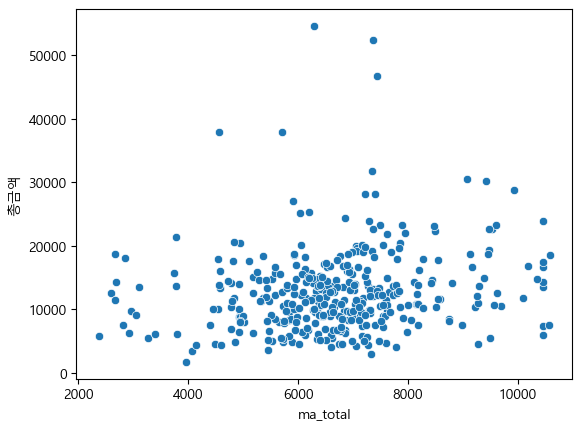

In [266]:
sns.scatterplot(data=total, x='ma_total', y='총금액')